In [0]:
import requests
import json
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
from datetime import datetime
from dateutil.parser import parse
plt.style.use('fivethirtyeight')
%matplotlib inline 


In [0]:
response = requests.get("https://a.4cdn.org/boards.json").json()

In [476]:
boards_ = pd.DataFrame()
boards_ = pd.io.json.json_normalize(response['boards'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [477]:
boards_[boards_['board'] == 'tv']

,board,title,ws_board,per_page,pages,max_filesize,max_webm_filesize,max_comment_chars,max_webm_duration,bump_limit,image_limit,meta_description,is_archived,cooldowns.threads,cooldowns.replies,cooldowns.images,spoilers,custom_spoilers,forced_anon,user_ids,country_flags,code_tags,webm_audio,min_image_width,min_image_height,oekaki,sjis_tags,text_only,require_subject,troll_flags,math_tags
59,tv,Television & Film,1,15,10,4194304,3145728,2000,120,310,150,&quot;/tv/ - Television &amp; Film&quot; is 4c...,1.0,600,60,60,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
# /g/

response = requests.get("https://a.4cdn.org/g/catalog.json").json()
threads_g = pd.io.json.json_normalize(response)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [479]:
#/tv/

response = requests.get("https://a.4cdn.org/tv/catalog.json").json()
threads_tv = pd.io.json.json_normalize(response)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [480]:
#/ck/

response = requests.get("https://a.4cdn.org/ck/catalog.json").json()
threads_ck = pd.io.json.json_normalize(response)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [481]:
#/lit/

response = requests.get("https://a.4cdn.org/lit/catalog.json").json()
threads_lit = pd.io.json.json_normalize(response)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#Converting JSON to DataFrame

output_threads_tv = pd.DataFrame()
j = 0
for i in range(len(threads_tv)):  
  output_threads_tv = output_threads_tv.append(threads_tv['threads'][i], ignore_index= False)


In [0]:
output_threads_lit = pd.DataFrame()
j = 0
for i in range(len(threads_lit)):  
  output_threads_lit = output_threads_lit.append(threads_lit['threads'][i], ignore_index= False)


In [0]:
output_threads_ck = pd.DataFrame()
j = 0
for i in range(len(threads_ck)):  
  output_threads_ck = output_threads_ck.append(threads_ck['threads'][i], ignore_index= False)


In [0]:
output_threads_g = pd.DataFrame()
j = 0
for i in range(len(threads_g)):  
  output_threads_g = output_threads_g.append(threads_g['threads'][i], ignore_index= False)


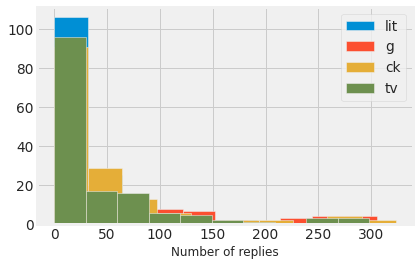

In [486]:
plt.hist(output_threads_lit['replies'].sort_values(ascending=False), label='lit')
plt.hist(output_threads_g['replies'].sort_values(ascending=False), label= 'g')
plt.hist(output_threads_ck['replies'].sort_values(ascending=False), label='ck')
plt.hist(output_threads_tv['replies'].sort_values(ascending=False), label='tv')
plt.legend()

plt.xlabel('Number of replies')
plt.legend()
plt.show()

### The number of average messages per thread lies between 50-100 for almost all the threads.

In [0]:
output_threads_tv.reset_index(inplace=True)
output_threads_ck.reset_index(inplace=True)
output_threads_lit.reset_index(inplace=True)
output_threads_g.reset_index(inplace=True)

In [488]:
!pip install contractions

In [489]:
import re, string, unicodedata
import nltk
import inflect
import contractions

from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
output_threads_tv['com'].fillna('an empty string',inplace=True)
output_threads_ck['com'].fillna('an empty string', inplace=True,axis=0)
output_threads_lit['com'].fillna(0, inplace=True,axis=0)
output_threads_g['com'].fillna(0, inplace=True,axis=0)

In [0]:
def url_replace(text):
  return re.sub('http\S+|www.\S+', '', text)
  #re.sub(r"[\n\t\r]*", "", text)
  #return text


def strip_html(text):
        text = str(text)
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()


def replace_contractions(text):
    return contractions.fix(text)


def denoise_text(text):
    #text = url_replace(text)
    text = strip_html(text)
    #print(len(text1))
    text = replace_contractions(text)
    #print(len(text2))
    text = re.sub(r"[\n\t\r]*", "", text)
    return text



#sample = denoise_text(output_threads.com)

In [0]:
#Denoise
def denoise(text):
  clean_text = []
  for i in text:
    clean_text.append(denoise_text(i))
  return clean_text

In [0]:
#Tokeinzation
def token(clean_text):
  words = []
  for i in range(len(clean_text)):
    words.append(nltk.word_tokenize(clean_text[i]))
  return words


In [0]:
#PreProcessed Data
def url_replace(text):
  return re.sub('http\S+|www.\S+', '', text)
  #re.sub(r"[\n\t\r]*", "", text)
  #return text


def strip_html(text):
        text = str(text)
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^A-Za-z]+', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    stopwords_modified = stopwords.words('english') + ['fuck','use','would', 'https','like']
    for word in words:
        if word not in stopwords_modified:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    #words = url_replace(words)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    #words = replace_numbers(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    return words

def words_preprocessed(words):
  words_preprocessed = []
  for i in range(len(words)):
    words_preprocessed.append(normalize(words[i]))
  return words_preprocessed


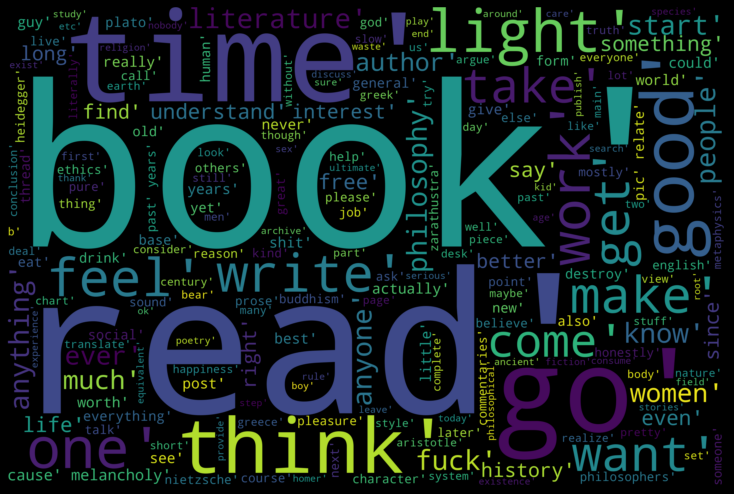

Literature
----------------------------------------------


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://youtu.be/hpH1CExE2yo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


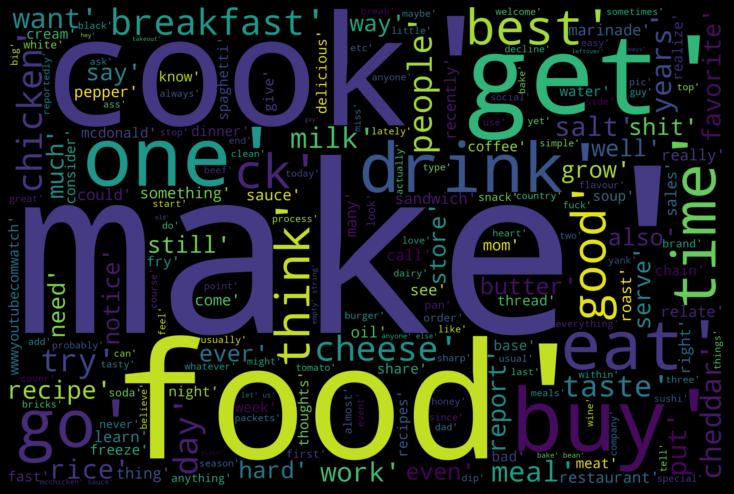

Cooking
----------------------------------------------


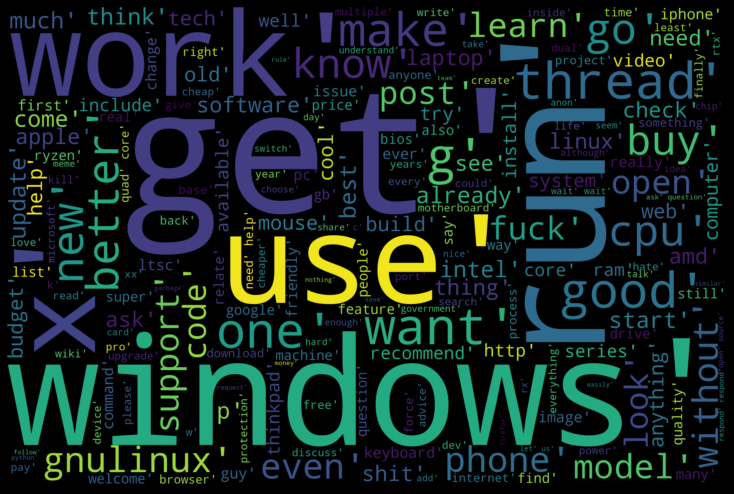

Technology
----------------------------------------------


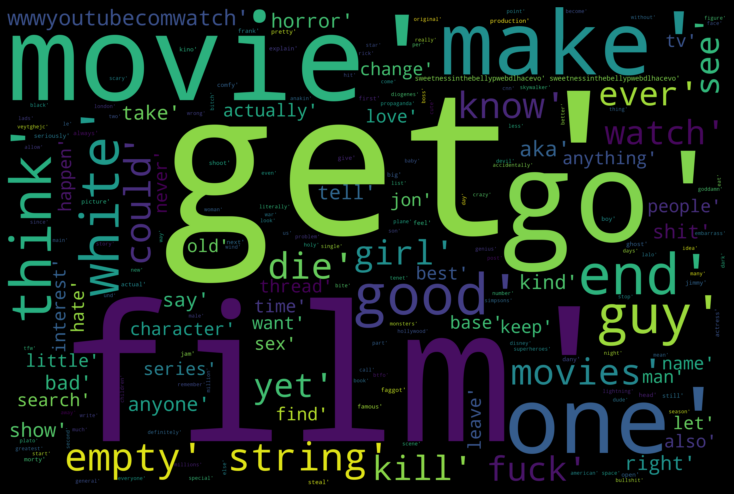

TV
----------------------------------------------


In [495]:
list_threads =[output_threads_lit,output_threads_ck,output_threads_g,output_threads_tv]
topic = ['Literature','Cooking','Technology','TV']
for v,i in enumerate(list_threads):
  clean_text = denoise(i['com'])
  words = token(clean_text)
  words_preprocessed_  = words_preprocessed(words)
  #for index in range(len(i)):
  i['preprocessed_review'] = words_preprocessed_
  from wordcloud import WordCloud, STOPWORDS
  wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(words_preprocessed_))
  fig = plt.figure(
    figsize = (10, 20),
    facecolor = 'k',
    edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()
  print(topic[v])
  print('----------------------------------------------')


## As we can clearly see, different genres have different words used in them. It is easily identifiable to which category it belongs!

In [496]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [497]:
output_threads_ck['preprocessed_review']

0      [thewolfepitno, bullshit, gay, liberal, agenda...
1      [hey, coocks, good, ways, leftover, rice, get,...
2                                  [dinner, serve, boys]
3                                     [go, master, race]
4      [lads, ever, buy, limit, edition, bottle, plan...
                             ...                        
145                      [cook, italian, sausages, desu]
146    [comfort, food, plain, rice, butter, salt, cou...
147    [country, barely, culture, produce, probably, ...
148                    [get, rid, brand, iconic, mascot]
149    [breakfast, important, meal, day, one, buy, it...
Name: preprocessed_review, Length: 150, dtype: object

In [0]:
sid = SentimentIntensityAnalyzer()


In [0]:
list_contents =[]
list_val = []
for index in range(len(output_threads_ck['preprocessed_review'])):
    list_contents.append(' '.join(output_threads_ck['preprocessed_review'][index]))

In [0]:
scores_list = []
for sentence in list_contents:
        scores = sid.polarity_scores(sentence)
        scores_list.append(scores)


In [0]:
sentiment_df = pd.DataFrame((scores_list))


In [504]:
sentiment_df['compound'].sum()

21.593100000000003

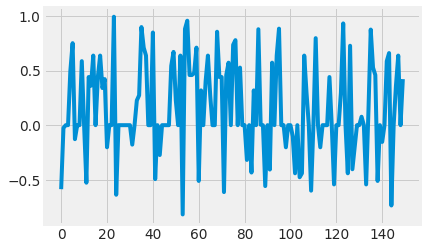

In [505]:
plt.plot(sentiment_df['compound'])

In [0]:
#ck:0,tv:1,lit:2,g:3

output_threads_ck['Party'] = 0
output_threads_tv['Party'] = 1
output_threads_lit['Party'] = 2
output_threads_g['Party'] = 3




In [0]:
merged_threads = pd.DataFrame()
cols_ck = [output_threads_ck['preprocessed_review'],output_threads_ck['Party']]
cols_g = [output_threads_g['preprocessed_review'],output_threads_g['Party']]
cols_tv = [output_threads_tv['preprocessed_review'],output_threads_tv['Party']]
cols_lit = [output_threads_lit['preprocessed_review'],output_threads_lit['Party']]

merged_threads_ck = pd.DataFrame(cols_ck)
merged_threads_g = pd.DataFrame(cols_g)
merged_threads_tv = pd.DataFrame(cols_tv)
merged_threads_lit = pd.DataFrame(cols_lit)

In [0]:
merged_threads_ck =merged_threads_ck.T
merged_threads_g = merged_threads_g.T
merged_threads_lit = merged_threads_lit.T
merged_threads_tv = merged_threads_tv.T

In [509]:
merged_threads_ck

,preprocessed_review,Party
0,"[thewolfepitno, bullshit, gay, liberal, agenda...",0
1,"[hey, coocks, good, ways, leftover, rice, get,...",0
2,"[dinner, serve, boys]",0
3,"[go, master, race]",0
4,"[lads, ever, buy, limit, edition, bottle, plan...",0
...,...,...
145,"[cook, italian, sausages, desu]",0
146,"[comfort, food, plain, rice, butter, salt, cou...",0
147,"[country, barely, culture, produce, probably, ...",0
148,"[get, rid, brand, iconic, mascot]",0


In [0]:
df = pd.concat([merged_threads_ck, merged_threads_g, merged_threads_lit, merged_threads_tv], axis=0)


In [0]:
df.reset_index(inplace=True)

In [0]:
df.drop(['index'],inplace=True, axis =1)

In [513]:
df

,preprocessed_review,Party
0,"[thewolfepitno, bullshit, gay, liberal, agenda...",0
1,"[hey, coocks, good, ways, leftover, rice, get,...",0
2,"[dinner, serve, boys]",0
3,"[go, master, race]",0
4,"[lads, ever, buy, limit, edition, bottle, plan...",0
...,...,...
593,"[show, movies, pic, relate, appeal, normiessex...",1
594,"[cia, zoom, pixelated, picture, become, clear, k]",1
595,"[anyone, else, attend, adult, swim, shiver, tr...",1
596,"[problem, also, docukino, thread]",1


In [0]:
 #0.15 for val, 0.15 for test, 0.7 for train
val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)

# Shuffle the data
df = df.sample(frac=1)
# Split tweets df to test/val/train
test_df = df[:test_size]
val_df = df[test_size:test_size+val_size]
train_df = df[test_size+val_size:]


train_texts, train_labels = list(train_df.preprocessed_review	), list(train_df.Party)
val_texts, val_labels     = list(val_df.preprocessed_review	), list(val_df.Party)
test_texts, test_labels   = list(test_df.preprocessed_review	), list(test_df.Party)

In [0]:
#Training corpus
list_contents =[]
list_val = []
list_test = []

for index in range(len(train_texts)):
    list_contents.append(' '.join(train_texts[index]))


for index in range(len(val_texts)):
    list_val.append(' '.join(val_texts[index]))

for index in range(len(test_texts)):
    list_test.append(' '.join(test_texts[index]))   

In [0]:
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score


In [517]:
#SGD Classifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 5))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-4, random_state=42, max_iter=40, tol=None)),
               ])
sgd.fit(list_contents, train_labels)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 5), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                     

In [518]:
y_pred = sgd.predict(list_val)
print(classification_report(val_labels,y_pred))

f1_score(val_labels, y_pred, average='weighted')

              precision    recall  f1-score   support

           0       0.71      0.55      0.62        22
           1       0.56      0.45      0.50        20
           2       0.54      0.65      0.59        23
           3       0.68      0.79      0.73        24

    accuracy                           0.62        89
   macro avg       0.62      0.61      0.61        89
weighted avg       0.62      0.62      0.61        89



0.6135543240632466

In [519]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 5))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e6)),
               ]
               )
logreg.fit(list_contents, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 5), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [520]:
y_pred = logreg.predict(list_val)
print(classification_report(val_labels,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.53      0.40      0.46        20
           2       0.50      0.65      0.57        23
           3       0.74      0.71      0.72        24

    accuracy                           0.60        89
   macro avg       0.60      0.59      0.59        89
weighted avg       0.60      0.60      0.59        89



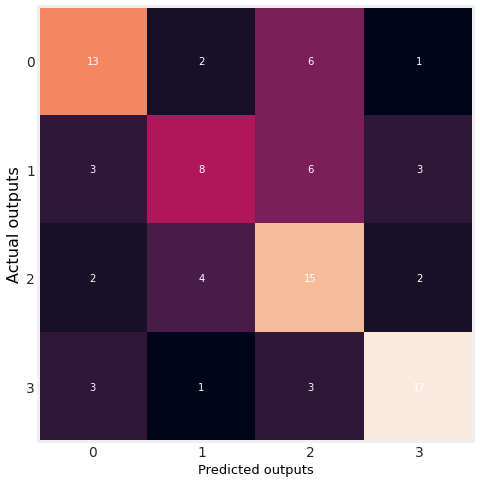

In [524]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_labels, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize='13', color='black')
ax.set_ylabel('Actual outputs', fontsize='16', color='black')
ax.xaxis.set(ticks=range(4))
ax.yaxis.set(ticks=range(4))
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## ck-0  tv-1    lit-2   g-3
As we can see, 0,1 are often interchanged i.e. Cooking and TV

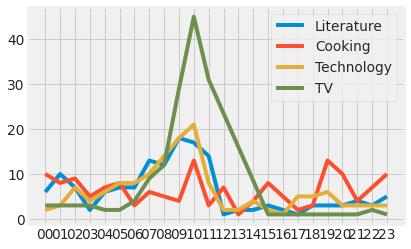

In [525]:
for v,i in enumerate(list_threads):
  i['time_'] = i['now'].str.split(')').str[-1]
  i['hour'] = i['time_'].str.split(':').str[0]
  plt.plot(i['hour'].value_counts().sort_index(), label=topic[v])
  plt.legend()

As seen, Questions about TV have been asked during a particular timeframe. May be just after going to sleep or something of that sort.

Except cooking, 6-10 hours is a highly-active time for all other boards.

In [526]:
!pip install pyLDAvis

In [0]:
import pandas as pd
from gensim import corpora
import pickle
import gensim
import ast
import pyLDAvis.gensim
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def dealing_with_list(text):
  list_contents =[]

  for index in range(len(text)):
    list_contents.append(' '.join(text['preprocessed_review'][index]))
  return list_contents

In [0]:
output_threads_ck_list = dealing_with_list(output_threads_ck)
output_threads_g_list = dealing_with_list(output_threads_g)
output_threads_tv_list = dealing_with_list(output_threads_tv)
output_threads_lit_list = dealing_with_list(output_threads_lit)

list_plot = [output_threads_lit_list, output_threads_ck_list, output_threads_g_list, output_threads_tv_list]

Literature
---------------------------------------------------------------------------------


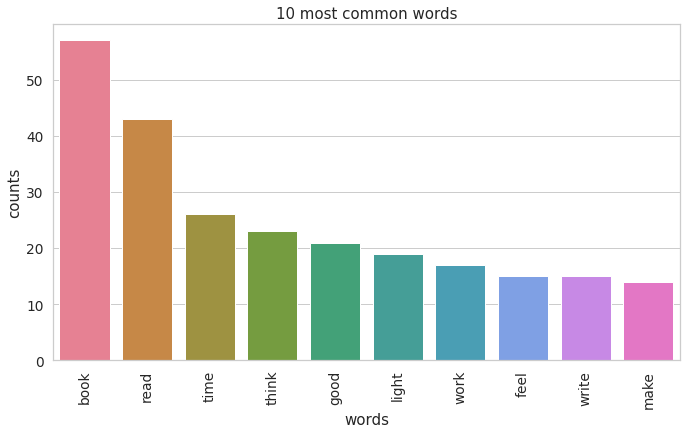

Topics found via LDA:

Topic #0:
book read good time light people literature post life think

Topic #1:
read fuck time book philosophy think plato heidegger buddhism work

Topic #2:
book cause melancholy drink time little eat better men read

Topic #3:
book zarathustra feel time understand years long greece worth come

Topic #4:
read work good write book guy light thread translate think
Cooking
---------------------------------------------------------------------------------


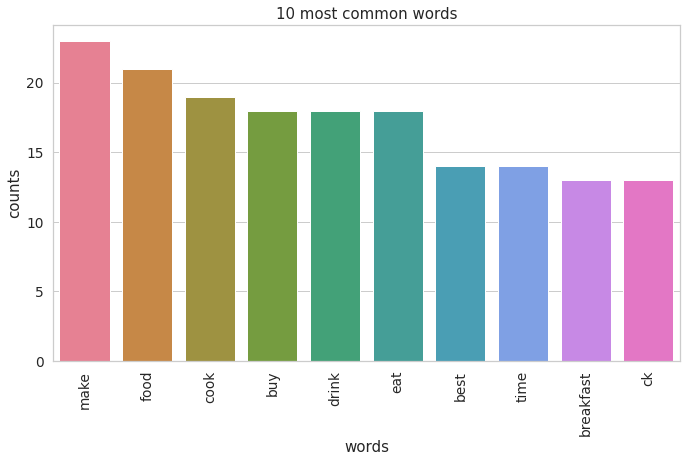

Topics found via LDA:

Topic #0:
cheddar buy notice grow cheese ck cook freeze taste thoughts

Topic #1:
breakfast drink make report best time sales meal good people

Topic #2:
eat cook best day milk years time buy recipes think

Topic #3:
food make think sauce rice good ck chicken time cook

Topic #4:
food try recipe miss drink sandwich eat actually butter tell
Technology
---------------------------------------------------------------------------------


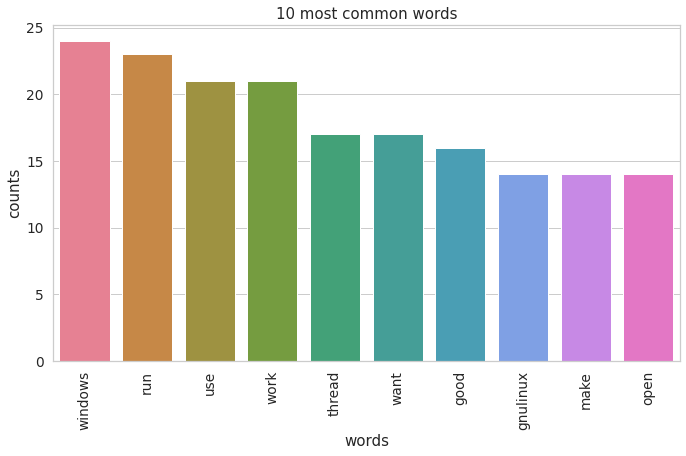

Topics found via LDA:

Topic #0:
windows work gnulinux want update thread software ltsc command friendly

Topic #1:
open new windows wait respond happen start try work project

Topic #2:
need good cpu help bios run windows post start think

Topic #3:
run use phone better budget core shit good work cpu

Topic #4:
model buy intel code know make best tech thread core
TV
---------------------------------------------------------------------------------


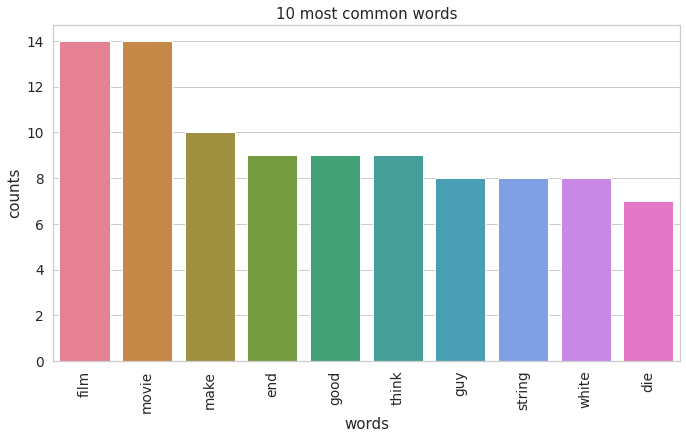

Topics found via LDA:

Topic #0:
white film girl guy sweetnessinthebellypwebdlhacevo good wwwyoutubecomwatch kill want fuck

Topic #1:
best end film wwwyoutubecomwatch movies time explain nice think jam

Topic #2:
string think aka horror kind change make little let film

Topic #3:
search watch movie actress good character tell thread btfo million

Topic #4:
movie make hate die production dany shoot kill end leave


In [531]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(10, 10/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model

# Fit and transform the processed titles
for i,v in enumerate(list_plot):
  count_data = count_vectorizer.fit_transform(v)
  lda = LDA(n_components=number_topics, n_jobs=-1)
  lda.fit(count_data)
# Print the topics found by the LDA model
  print(topic[i])
  print('---------------------------------------------------------------------------------')
# Visualise the 10 most common words
  plot_10_most_common_words(count_data, count_vectorizer)
  print("Topics found via LDA:")
  print_topics(lda, count_vectorizer, number_words)

### To summarize,

1- Extracted Data from 4Chan

2- Normalized the Json file to a Dataframe

3- PreProcessing Steps:

    - Remove HTML script
    - Remove URLs
    - Tokenize
    - StopWords
    - Lower Case
    - Lemmatization

4- Word Frequency of each thread

5- Tried Sentiment Analysis, found nothing concrete.

6- Merged threads and board names of each thread to a dataframe.

7- Used tfidf and SGD, Logisic Regression for MultiClass Classification

8- Topic Modeling to Distinguish between threads